## Import Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score, KFold

import pickle

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
data = pd.read_csv('Medicalpremium.csv')

In [3]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


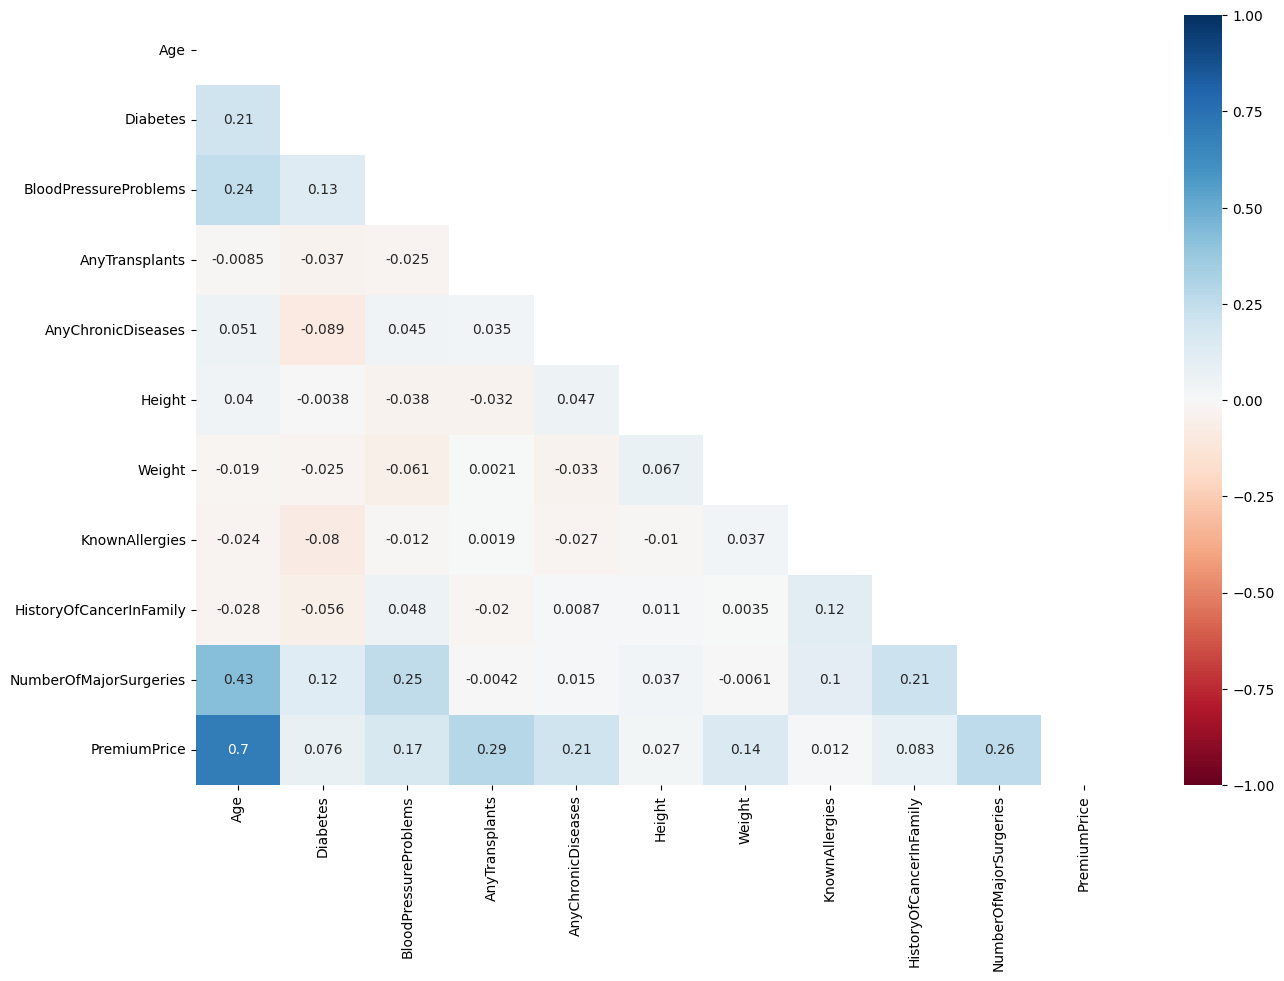

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='RdBu',vmax=1,vmin=-1,mask=np.triu(data.corr()))
plt.show()

## Data Analysis

### Univariate Analysis

In [7]:
num_cols = ['Age', 'Height', 'Weight','PremiumPrice']
cat_cols = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases',
            'KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

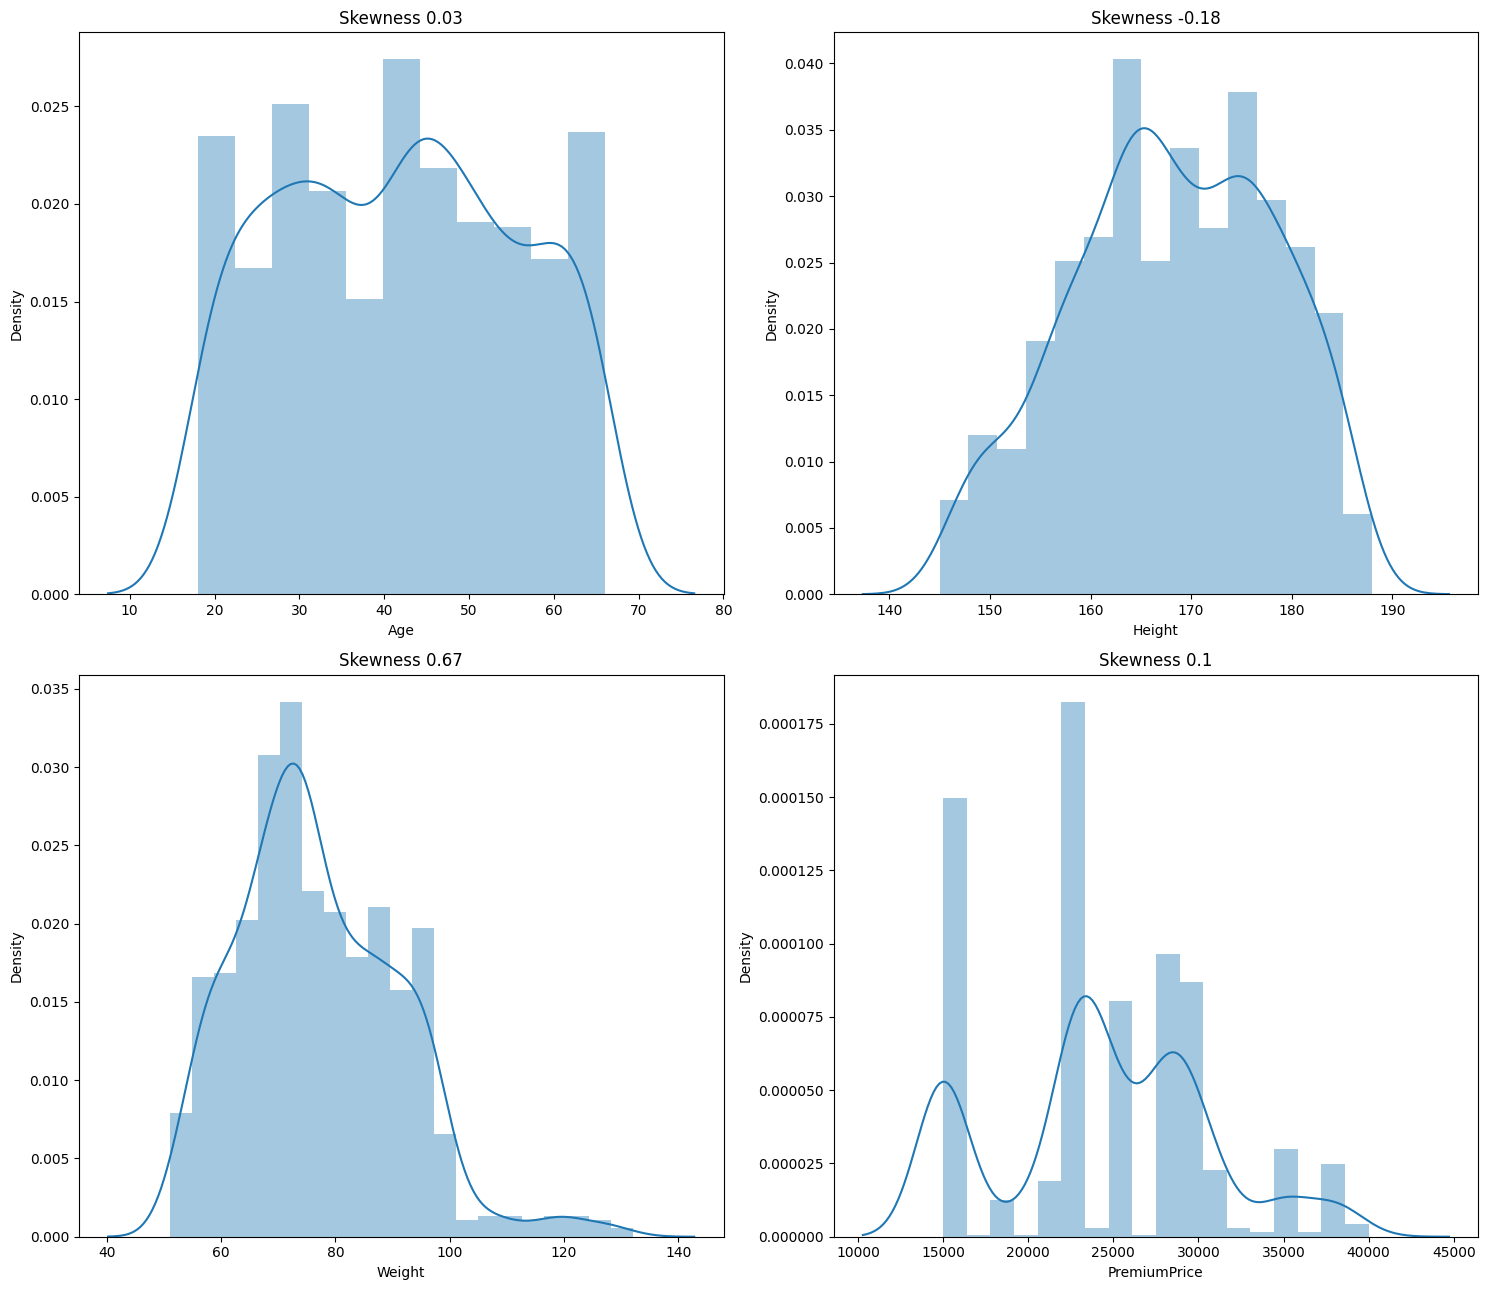

In [8]:
plt.figure(figsize=(15,13))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    plt.title(f'Skewness {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

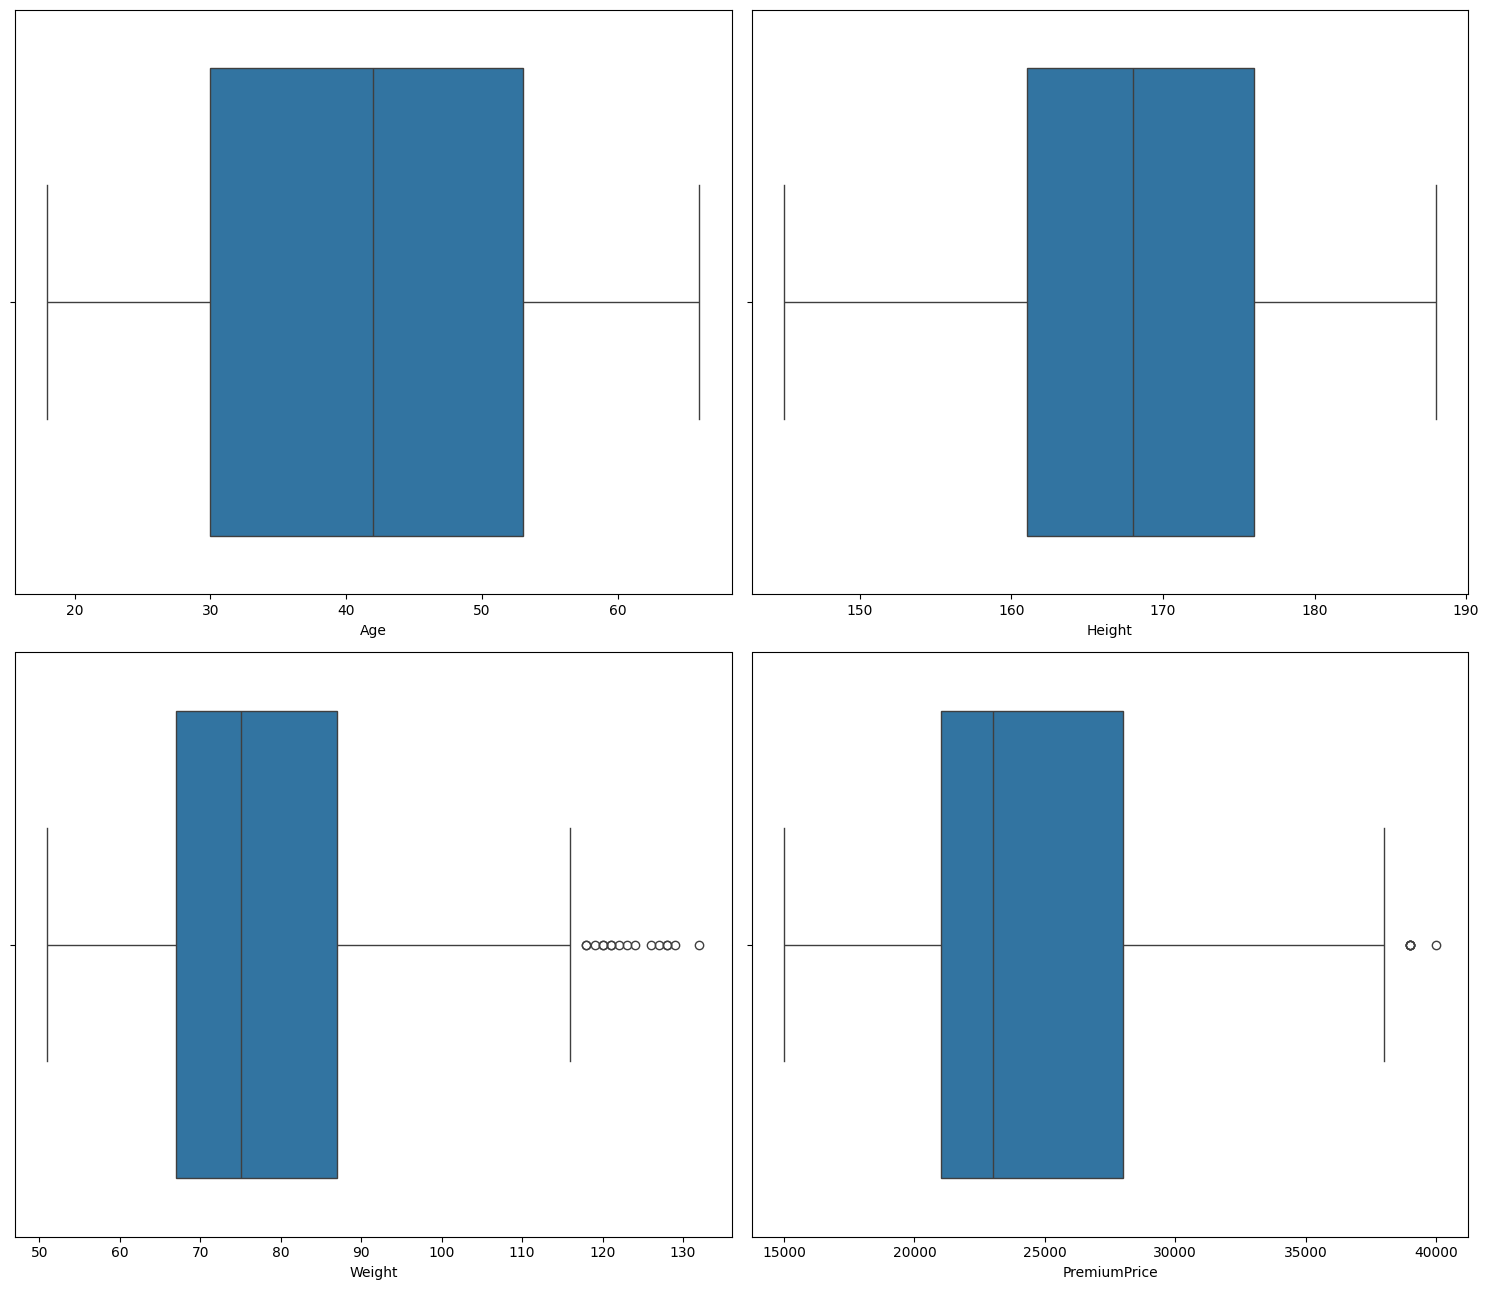

In [9]:
plt.figure(figsize=(15,13))
t=1
for i in num_cols:
    plt.subplot(2,2,t)
    sns.boxplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

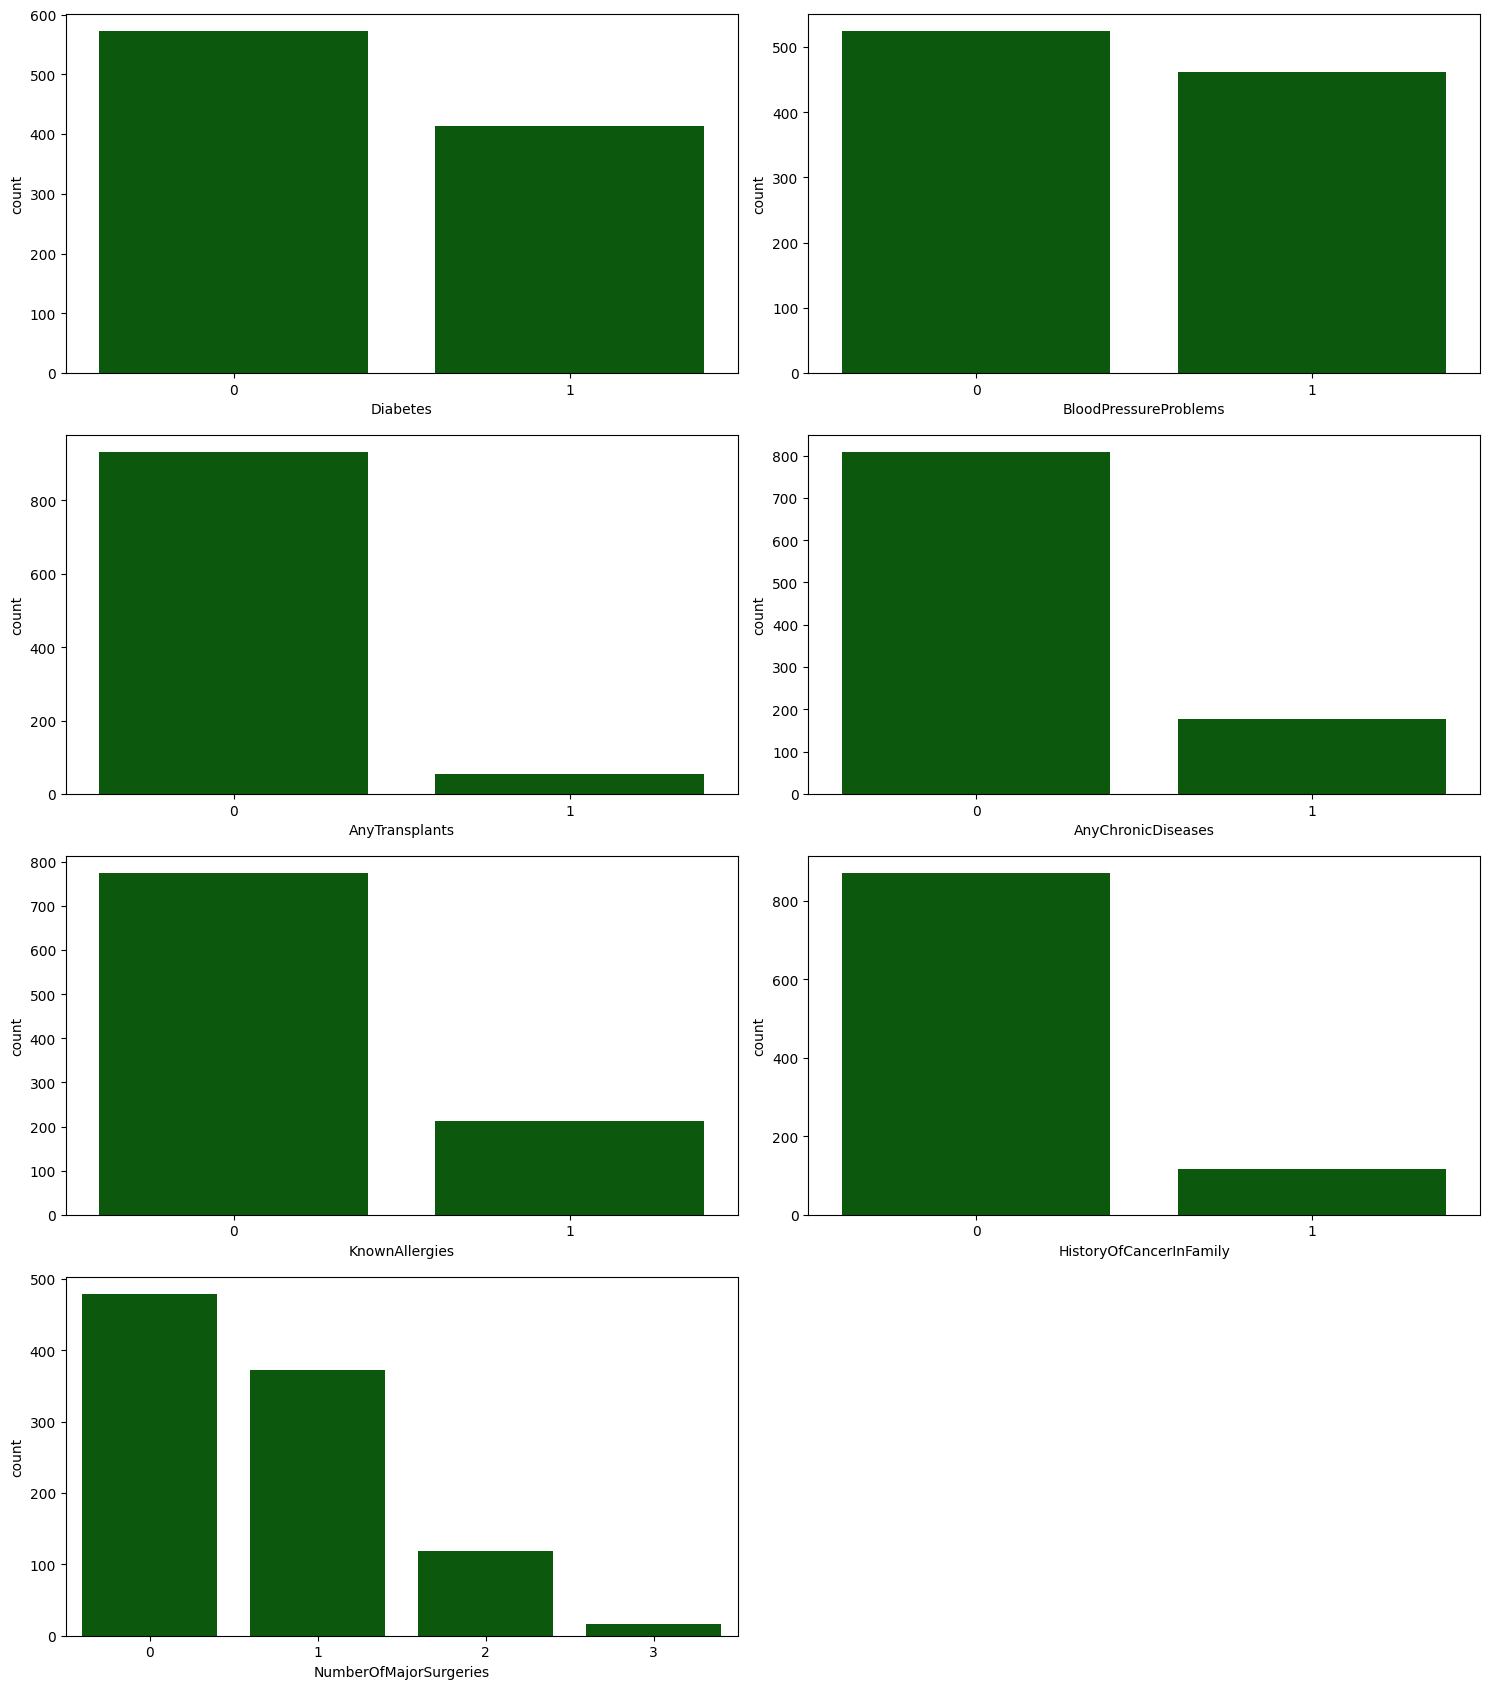

In [10]:
plt.figure(figsize=(15,17))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i,color='darkgreen')
    t+=1
plt.tight_layout()
plt.show()

Inferences:
* All numerical columns have no skewnss excepect weight which is moderatly right skewed.
* There are some outliers in Weight and Premium Price, but there are no extreme outliers.
* There are very few people who have undergone any transplant.
* Less people have chronic diseases.
* Very less people have cancer history in family.
* It very rare that a person has undergone 2 or more major surgeries.

### Bivariate Analysis

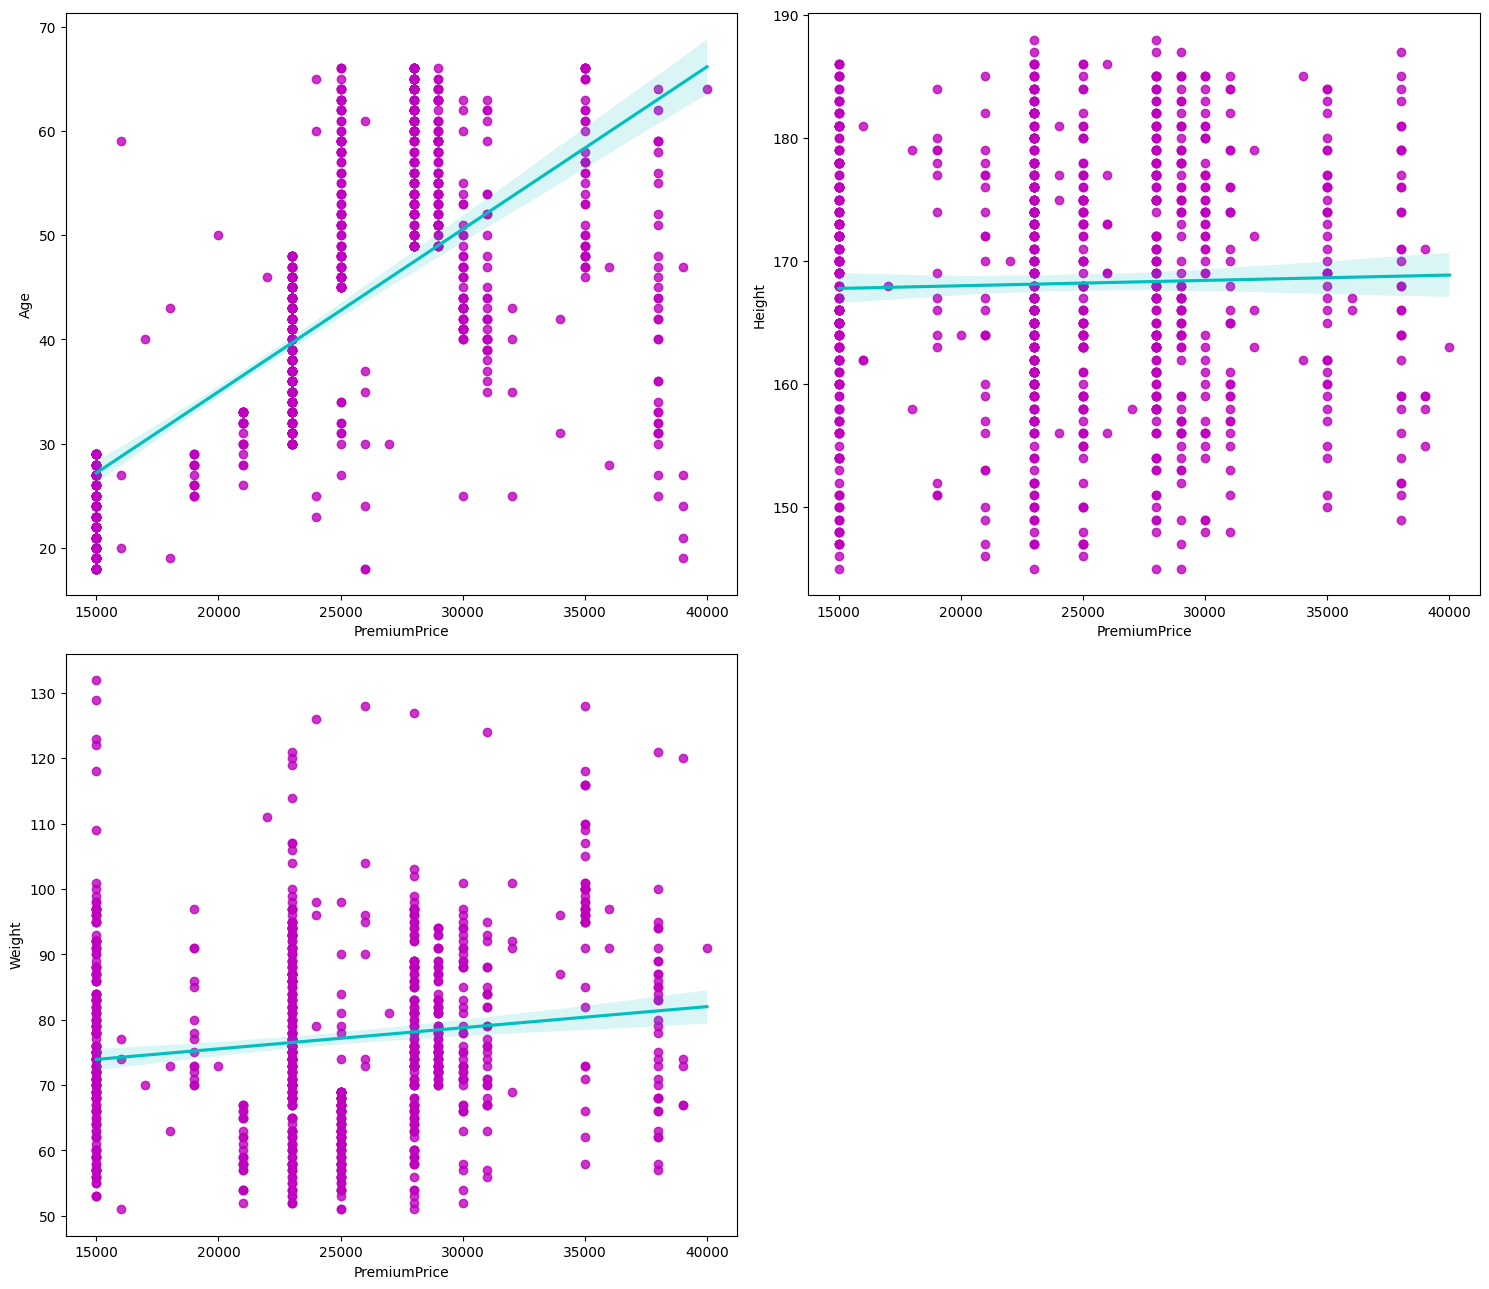

In [11]:
plt.figure(figsize=(15,13))
t=1
for i in num_cols:
    if i != 'PremiumPrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['PremiumPrice'],y=data[i],line_kws={'color':'c'},
                   color='m')
        t+=1
plt.tight_layout()
plt.show()

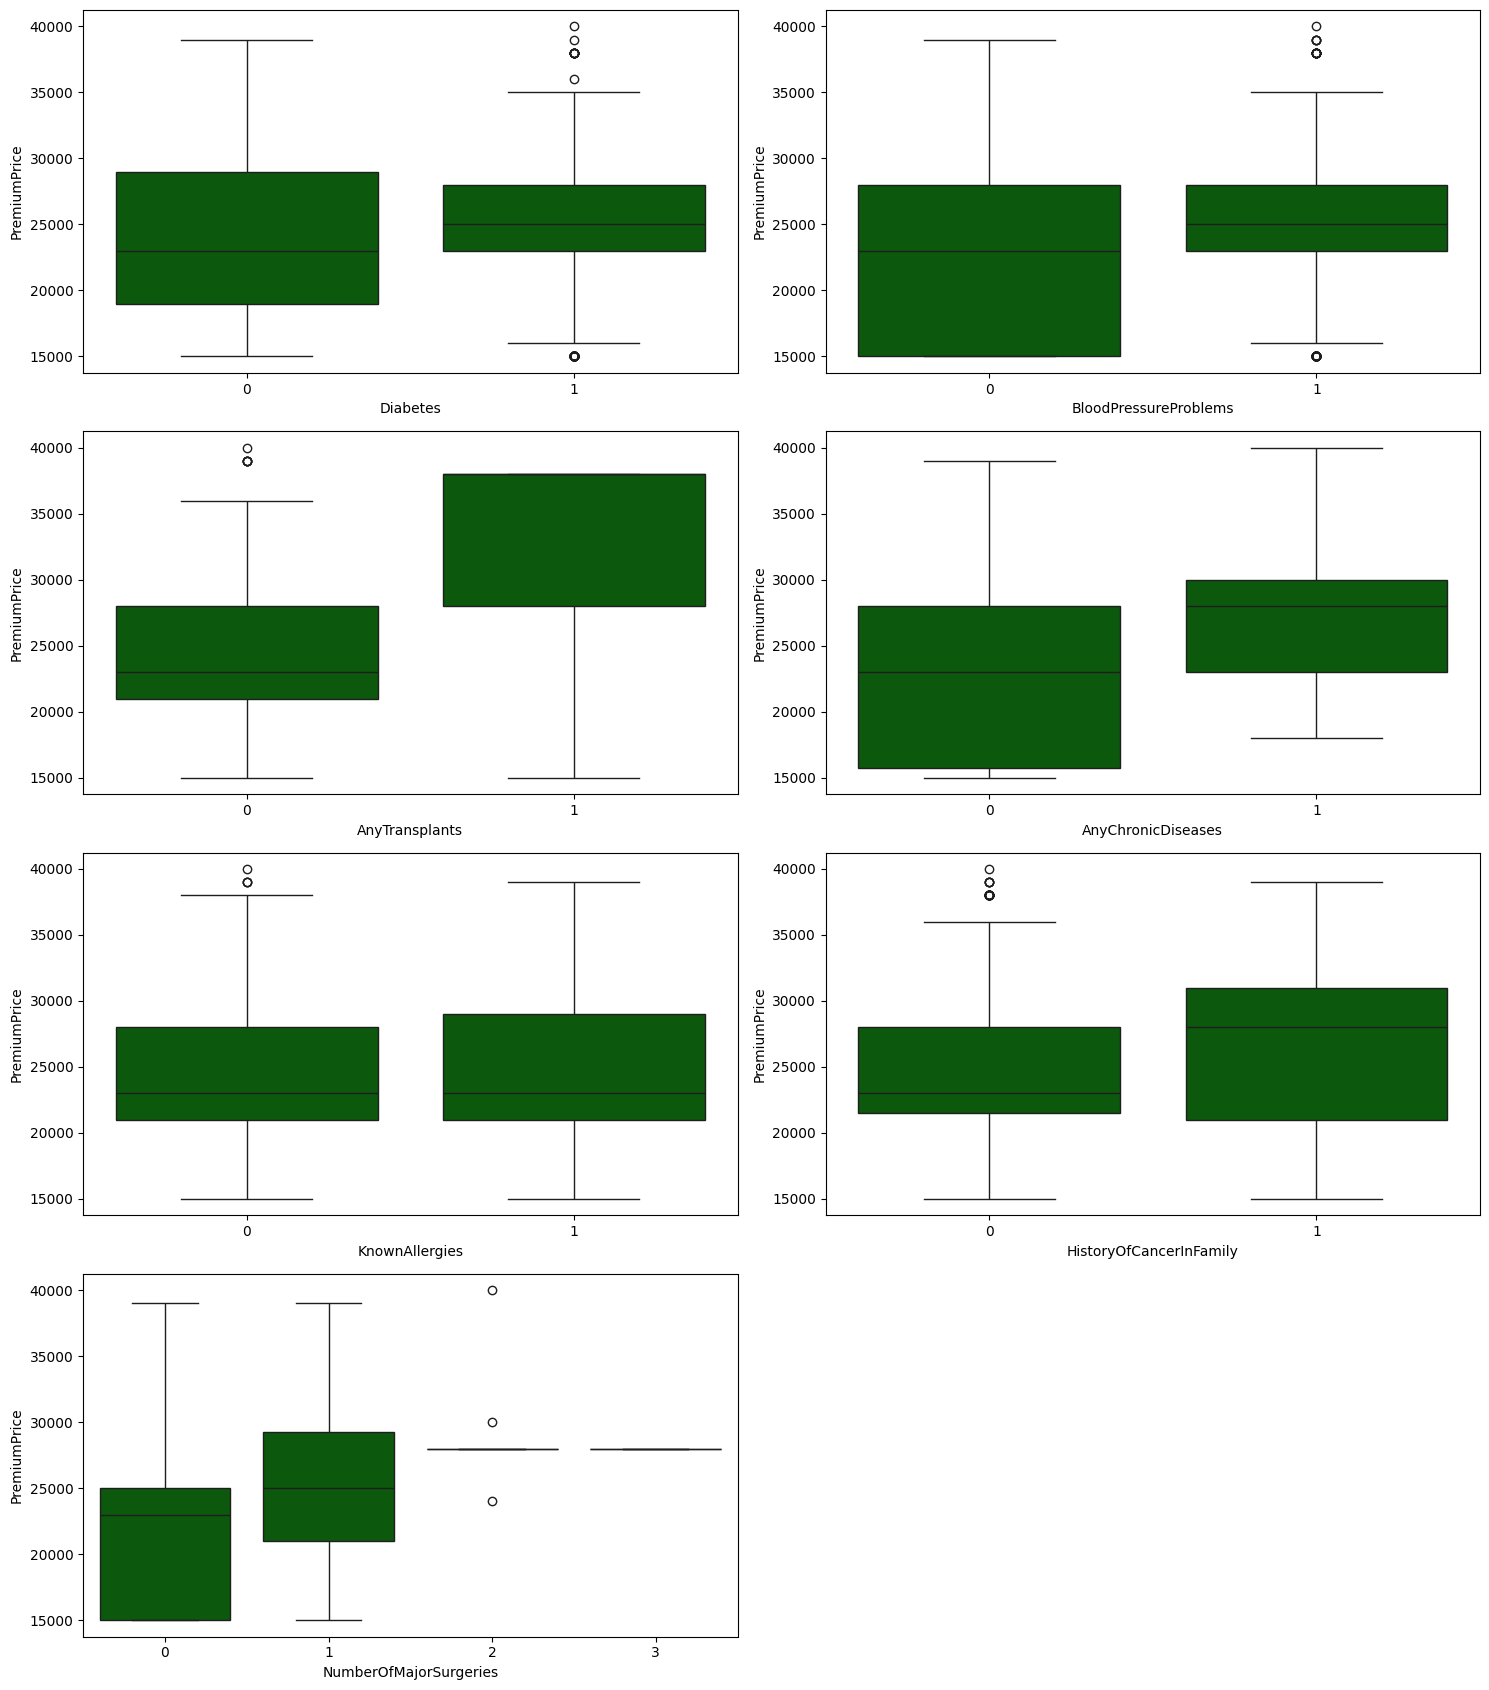

In [12]:
plt.figure(figsize=(15,17))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=data[i],y=data['PremiumPrice'],color='darkgreen')
    t+=1
plt.tight_layout()
plt.show()

Inferences:

* As age increases the premium price increases.
* Premium is higher for people with transplants.
* Premium price increases with increse in number of major surgeries.
* People with cancer history in family have pay higher premiums.

## Data Preprocessing

### Treating defects

In [13]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [14]:
data[data.duplicated()]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice


Inference:
* There are no extreme outliers.
* There are no missing values and duplicate records.
* All the category columns are already encoded.

## Predictive Modelling

In [15]:
y = data['PremiumPrice']
x = data.drop(columns=['PremiumPrice'])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=3)

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(788, 10) (788,) (198, 10) (198,)


In [18]:
mse = []
rmse = []
mape =[]
mod = []

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
  

    print('MSE',mean_squared_error(ytest,pred))
    print('RMSE',mean_squared_error(ytest,pred)**0.5)
    print('MAPE',mean_absolute_percentage_error(ytest,pred))

    response = input('Do you want to save the model? Y/N')
    if response.lower()=='y':
        mse.append(mean_squared_error(ytest,pred))
        rmse.append(mean_squared_error(ytest,pred)**0.5)
        mape.append(mean_absolute_percentage_error(ytest,pred))
        mod.append(str(m))

        global scorecard

        scorecard = pd.DataFrame({'Model':mod,'MSE':mse,'RMSE':rmse,'MAPE':mape})
    else:
        return    

### Linear Regression

In [19]:
model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

MSE 11327372.238875255
RMSE 3365.6161752159524
MAPE 0.10960558460257806


Do you want to save the model? Y/N y


In [20]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606


### Decesion Tree

In [21]:
model_validation(DecisionTreeRegressor(max_depth=8),x_train,y_train,x_test,y_test)

MSE 10314143.147537263
RMSE 3211.563972200657
MAPE 0.04897297559896026


Do you want to save the model? Y/N y


In [22]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606
1,DecisionTreeRegressor(max_depth=8),1.031414e+07,3211.563972,0.048973


### Random Forest

In [23]:
model_validation(RandomForestRegressor(n_estimators=100,max_depth=8,min_samples_split=50),
                x_train,y_train,x_test,y_test)

MSE 8576480.770756131
RMSE 2928.562919036593
MAPE 0.06828968439216127


Do you want to save the model? Y/N y


In [24]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606
1,DecisionTreeRegressor(max_depth=8),1.031414e+07,3211.563972,0.048973
2,"RandomForestRegressor(max_depth=8, min_samples...",8.576481e+06,2928.562919,0.068290


### Adaptive Boosting

In [25]:
model_validation(AdaBoostRegressor(n_estimators=200),x_train,y_train,x_test,y_test)

MSE 18922734.2363532
RMSE 4350.026923635439
MAPE 0.16324180497915192


Do you want to save the model? Y/N y


In [26]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606
1,DecisionTreeRegressor(max_depth=8),1.031414e+07,3211.563972,0.048973
2,"RandomForestRegressor(max_depth=8, min_samples...",8.576481e+06,2928.562919,0.068290
3,AdaBoostRegressor(n_estimators=200),1.892273e+07,4350.026924,0.163242


### Gradient Boosting

In [27]:
model_validation(GradientBoostingRegressor(n_estimators=100,max_depth=8),x_train,y_train,x_test,y_test)

MSE 9056545.247927496
RMSE 3009.409451691062
MAPE 0.05066196131699539


Do you want to save the model? Y/N y


In [28]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606
1,DecisionTreeRegressor(max_depth=8),1.031414e+07,3211.563972,0.048973
2,"RandomForestRegressor(max_depth=8, min_samples...",8.576481e+06,2928.562919,0.068290
3,AdaBoostRegressor(n_estimators=200),1.892273e+07,4350.026924,0.163242
4,GradientBoostingRegressor(max_depth=8),9.056545e+06,3009.409452,0.050662


### XGBoost

In [29]:
model_validation(XGBRegressor(estimators=150,max_depth=8),x_train,y_train,x_test,y_test)

MSE 7328406.404064217
RMSE 2707.102954093955
MAPE 0.05439616227977988


Do you want to save the model? Y/N y


In [30]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606
1,DecisionTreeRegressor(max_depth=8),1.031414e+07,3211.563972,0.048973
2,"RandomForestRegressor(max_depth=8, min_samples...",8.576481e+06,2928.562919,0.068290
3,AdaBoostRegressor(n_estimators=200),1.892273e+07,4350.026924,0.163242
4,GradientBoostingRegressor(max_depth=8),9.056545e+06,3009.409452,0.050662
5,"XGBRegressor(base_score=None, booster=None, ca...",7.328406e+06,2707.102954,0.054396


Inference:

* From above scorecard it can be seen that XGB Regressor has the minimum MSE and RMSE.
* Lets Fine tune this model to get even better RMSE.

### Fine tune XGB Regressor

In [31]:
grid = {'estimators':[60,70,80,100,120],
       'max_depth':[4,5,6,7,8,10]}

In [32]:
gscv = GridSearchCV(estimator=XGBRegressor(),
                    param_grid=grid, cv=5, scoring='neg_mean_squared_error', verbose=3,)

In [33]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .estimators=60, max_depth=4;, score=-7436112.803 total time=   0.0s
[CV 2/5] END estimators=60, max_depth=4;, score=-14010140.150 total time=   0.0s
[CV 3/5] END estimators=60, max_depth=4;, score=-11351062.541 total time=   0.0s
[CV 4/5] END estimators=60, max_depth=4;, score=-12254127.532 total time=   0.0s
[CV 5/5] END .estimators=60, max_depth=4;, score=-8868523.907 total time=   0.0s
[CV 1/5] END .estimators=60, max_depth=5;, score=-7985920.102 total time=   0.0s
[CV 2/5] END estimators=60, max_depth=5;, score=-13551265.701 total time=   0.0s
[CV 3/5] END estimators=60, max_depth=5;, score=-11443163.785 total time=   0.1s
[CV 4/5] END estimators=60, max_depth=5;, score=-12114699.271 total time=   0.0s
[CV 5/5] END .estimators=60, max_depth=5;, score=-9658807.323 total time=   0.0s
[CV 1/5] END .estimators=60, max_depth=6;, score=-7419201.189 total time=   0.1s
[CV 2/5] END estimators=60, max_depth=6;, score

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'estimators': [60, 70, 80, 100, 120],
                         'max_depth': [4, 5, 6, 7, 8, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [34]:
gscv.best_params_

{'estimators': 60, 'max_depth': 4}

In [35]:
gscv.best_score_

-10783993.38652798

In [36]:
model_validation(XGBRegressor(**gscv.best_params_),x_train,y_train,x_test,y_test)

MSE 6937144.801832026
RMSE 2633.846009513849
MAPE 0.06367760798501658


Do you want to save the model? Y/N y


In [37]:
scorecard

,Model,MSE,RMSE,MAPE
0,LinearRegression(),1.132737e+07,3365.616175,0.109606
1,DecisionTreeRegressor(max_depth=8),1.031414e+07,3211.563972,0.048973
2,"RandomForestRegressor(max_depth=8, min_samples...",8.576481e+06,2928.562919,0.068290
3,AdaBoostRegressor(n_estimators=200),1.892273e+07,4350.026924,0.163242
4,GradientBoostingRegressor(max_depth=8),9.056545e+06,3009.409452,0.050662
5,"XGBRegressor(base_score=None, booster=None, ca...",7.328406e+06,2707.102954,0.054396
6,"XGBRegressor(base_score=None, booster=None, ca...",6.937145e+06,2633.846010,0.063678


## Final Model

In [38]:
final_model = XGBRegressor(**gscv.best_params_)

In [39]:
final_model.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, estimators=60, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [42]:
fi = final_model.feature_importances_

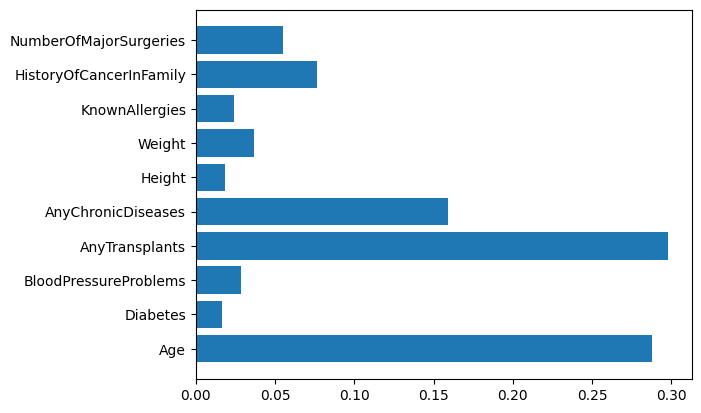

In [44]:
plt.barh(y=x.columns,width=fi)
plt.show()

In [46]:
# Top 5 Important Features

pd.DataFrame({'Feature Importance':fi},index=x.columns).sort_values(by='Feature Importance',ascending=False).head()

,Feature Importance
AnyTransplants,0.298066
Age,0.287707
AnyChronicDiseases,0.158816
HistoryOfCancerInFamily,0.076505
NumberOfMajorSurgeries,0.054821


## Deploy Final Model

In [48]:
with open('XGB Final model.pkl','wb') as file:
    pickle.dump(final_model,file)